<a href="https://colab.research.google.com/github/ramshamashood/CODSOFT/blob/main/CodsoftTask2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris (1).csv
User uploaded file "Iris (1).csv" with length 4617 bytes


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
missing_values = df.isnull().sum()
print(missing_values)


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [12]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


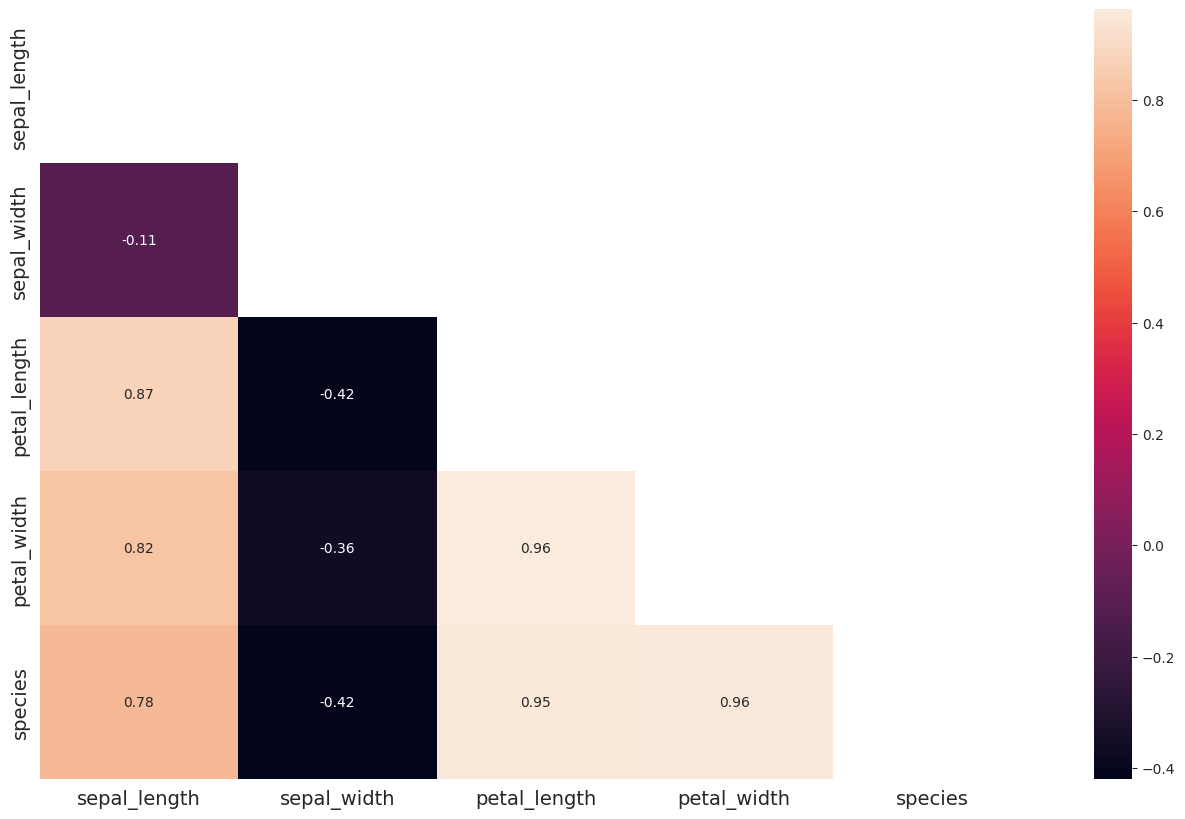

In [15]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 10})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

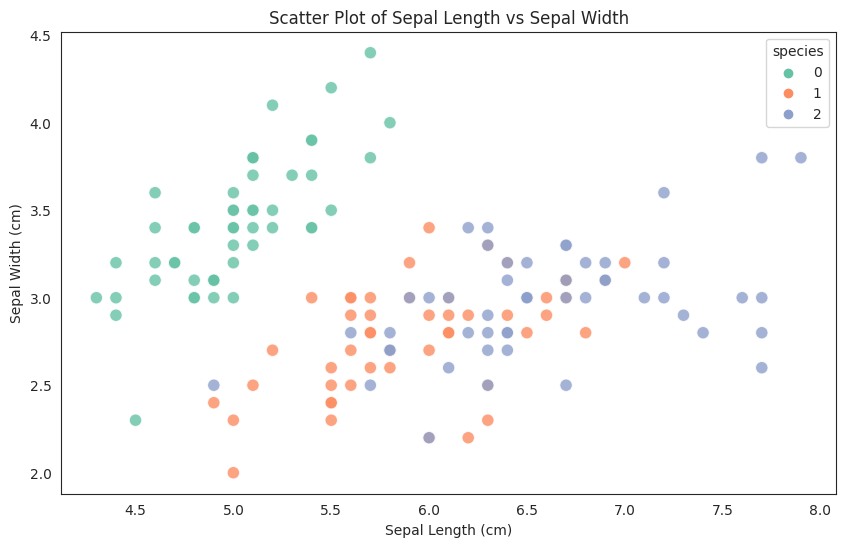

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue="species", palette="Set2", s=80, alpha=0.8)
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title='species')
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

feature_cols=["sepal_length	","sepal_width	","petal_length	","petal_width"]
X=df.drop(["species"],axis=1)
y=df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25) # 70% training and 30% test

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred,average='micro'))
print('Recall: ', recall_score(y_test, y_pred, average='micro'))
print('F1 Score: ', f1_score(y_test, y_pred,average='micro'))


Accuracy:  0.9555555555555556
Precision:  0.9555555555555556
Recall:  0.9555555555555556
F1 Score:  0.9555555555555556


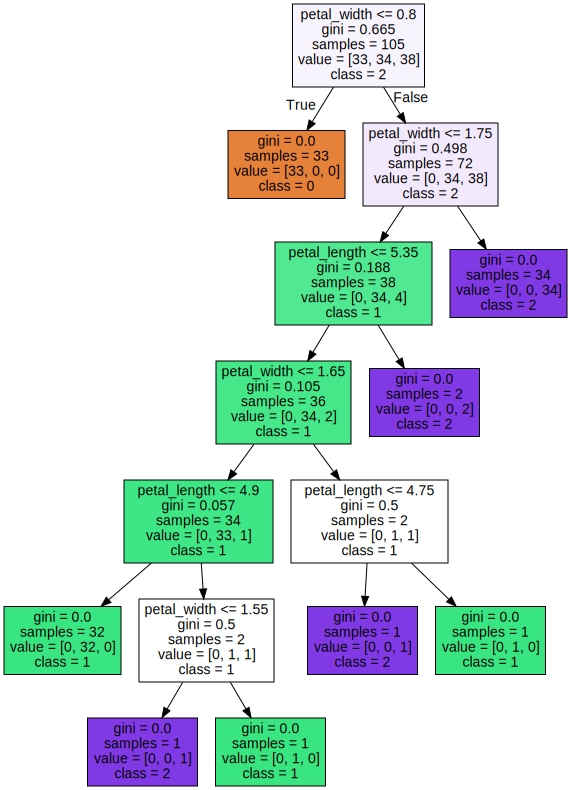

In [31]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_cols,
                                class_names=['0','1','2'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

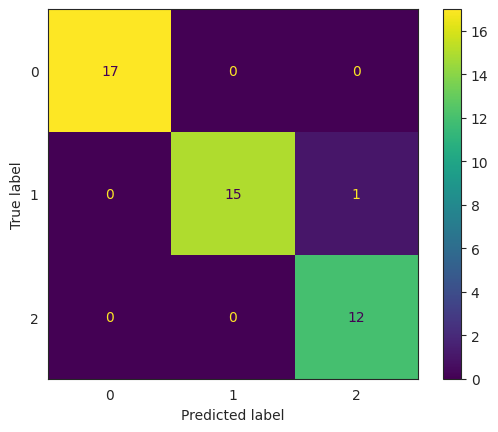

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();